In [1]:
import torch
import matplotlib.pyplot as plt
from loaders import get_train_eval_test
from exercise import VoxelMorph

In [2]:
#Loading model
ckpt = torch.load("models/last-v23.ckpt")['state_dict']
model = VoxelMorph(inp_channels = 2,out_channels = 2,activation = 'ReLU',nb_conv_per_level = 2, nb_features=[32,64,128,256],
         last_act_function = 'ReLU', unpooling="transp_conv")
new_state_dict = {}
for keys, values in ckpt.items():
    new_state_dict[keys[6:]] = values
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [3]:
#loading dataloaders
train,eval,test = get_train_eval_test()

In [4]:
#Loading input from test dataloader
for x in test:
    break

x.shape

torch.Size([64, 2, 32, 32])

In [5]:
#finding deformed images
out = model(x)
deformed = model.deform(x[:,1,:,:], out)
deformed.shape

torch.Size([64, 1, 32, 32])

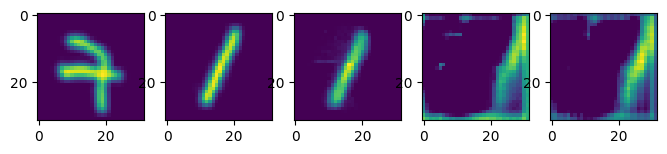

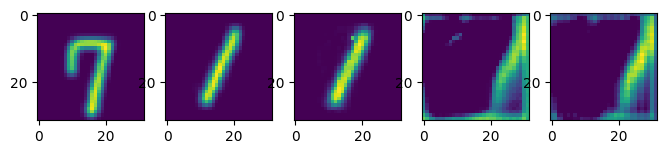

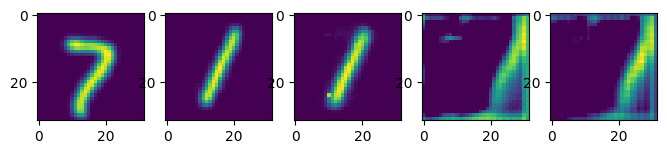

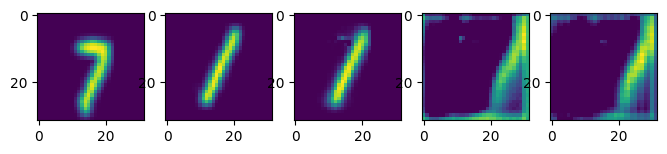

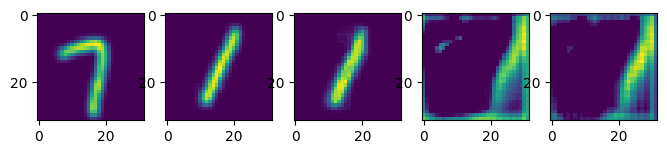

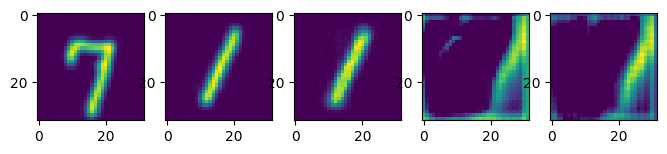

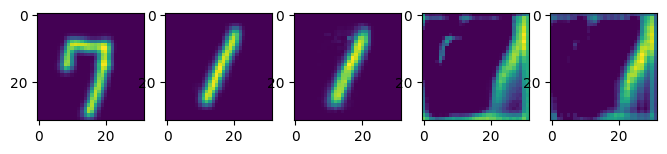

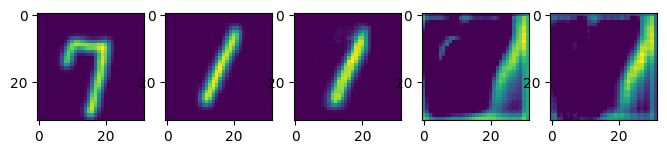

In [6]:
#show mov, fix, deformed and disp
for idx in range(8):
    fig, ax = plt.subplots(1,5, figsize=(8,8))
    ax[0].imshow(x[idx,1].detach())
    ax[1].imshow(x[idx,0].detach())
    ax[2].imshow(deformed[idx,0].detach())
    ax[3].imshow(out[idx,0].detach())
    ax[4].imshow(out[idx,1].detach())
    plt.show()